# Lets Grow more Data Science Internship Advanced Level Task-1

# Auther Name-Kshama Gaikwad

# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
# no.of dimensions of tesnor
print(x_train.ndim)

3


In [5]:
# dimension of tensor
print(x_train.shape)

(60000, 28, 28)


In [6]:
# datatype of tensor
print(x_train.dtype)

uint8


In [7]:
# Visualizing images & their labels

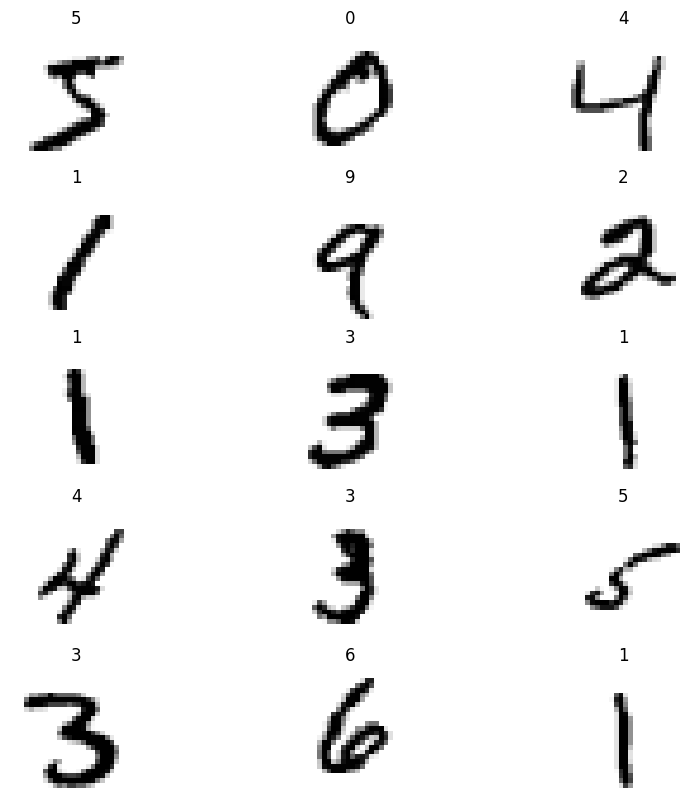

In [8]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,3,i+1)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.title(y_train[i])
  plt.axis('off')

In [9]:
# Preprocessing

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
# Labeeling

In [15]:
from keras.utils import to_categorical

In [16]:
y_train[0]

5

In [17]:
y_train.shape

(60000,)

In [18]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_train.shape

(60000, 10)

In [21]:
cnn=tf.keras.models.Sequential()

In [22]:
cnn.add(tf.keras.layers.Conv2D(16,activation='relu',kernel_size=(3,3),padding='same',input_shape=(28,28,1)))

In [23]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(32,activation='relu',padding='same',kernel_size=(3,3)))

In [25]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(64,activation='relu',padding='same',kernel_size=(3,3)))

In [27]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

In [28]:
cnn.add(tf.keras.layers.Flatten())

In [29]:
cnn.add(tf.keras.layers.Dense(16,activation='relu'))

In [30]:
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))

In [31]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [33]:
history=cnn.fit(x_train,y_train,validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 16s 8ms/step - loss: 0.2392 - accuracy: 0.9238 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0467 - val_accuracy: 0.9865
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0461 - val_accuracy: 0.9868
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0444 - val_accuracy: 0.9865
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0378 - val_accuracy: 0.9884
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0423 - val_accurac

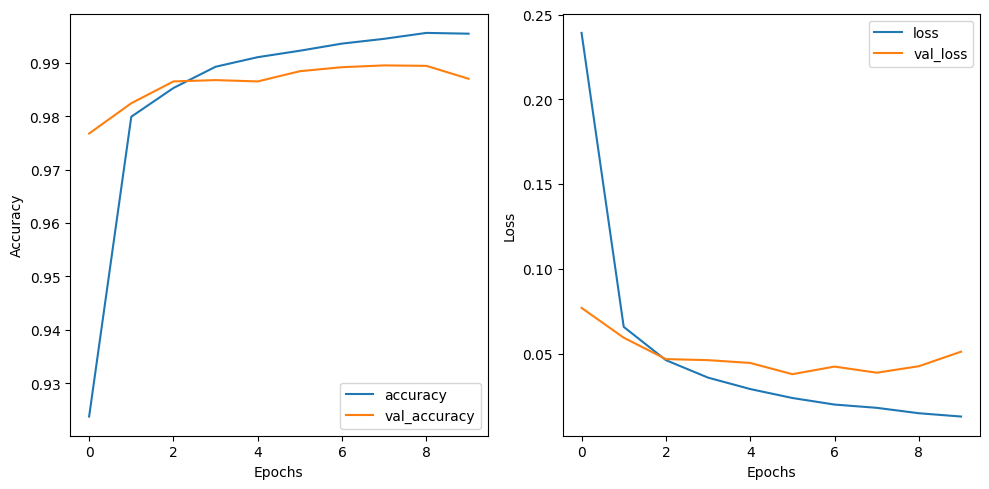

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [35]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.9876


In [41]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.9876


In [38]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [39]:
# Prediction for 1st image is 7 
np.argmax(y_pred[0])

7

In [40]:
# Verifying result
y_test[0]  # in result 7th position have 1 means output is 7 i.e. it gives accurate results.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [42]:
# Plot confusion matrix 
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

In [45]:
# Plotting Confusion Matrix

313/313 [==============================] - 1s 2ms/step


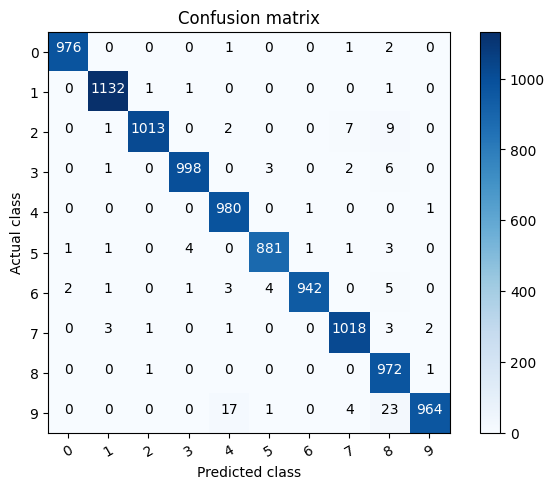

In [44]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = cnn.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))